In [28]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

import scipy.stats

%matplotlib inline

In [29]:
pop = pd.read_csv('grades.csv')

In [30]:
pop.head()

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


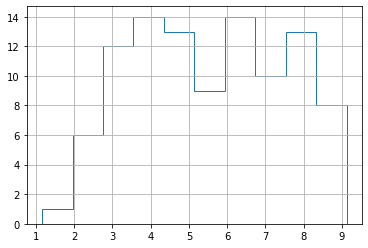

In [31]:
pop.grade.hist(histtype='step')

In [32]:
pop.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


In [33]:
pop.sample(100, replace=True).describe()

,grade
count,100.000000
mean,5.609117
std,1.985163
min,1.983167
25%,4.020809
50%,6.050065
75%,7.233760
max,8.888042


In [34]:
bootstrap = pd.DataFrame({'meangrade':[pop.sample(100, replace=True).grade.mean() for _ in range(1000)]})

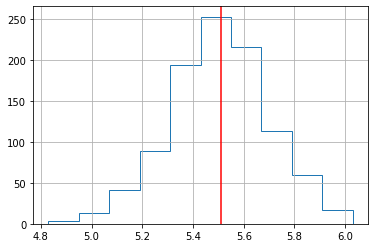

In [35]:
bootstrap.meangrade.hist(histtype='step')
plt.axvline(pop.grade.mean(), color='red')

In [36]:
bootstrap.meangrade.quantile(0.025), bootstrap.meangrade.quantile(0.975)

(5.103757755037662, 5.887105003295707)

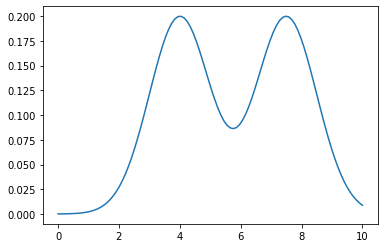

In [38]:
n1 = scipy.stats.norm(7.5, 1)
n2 = scipy.stats.norm(4, 1)

x = np.linspace(0, 10, 100)
plt.plot(x, 0.5*n1.pdf(x) + 0.5*n2.pdf(x))

In [41]:
def draw():
    while True:
        v = n1.rvs() if np.random.rand() < 0.5 else n2.rvs()
        if 0<=v<=10:
            return v

In [42]:
draw()

3.46502465324523

In [43]:
def dataset(n=100):
    return pd.DataFrame({'grade':[draw() for _ in range(n)]})

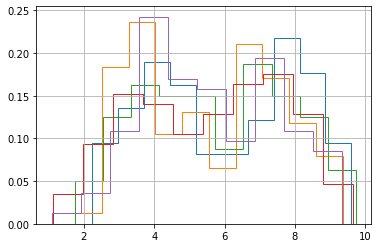

In [44]:
for _ in range(5):
    dataset(100).grade.hist(histtype='step', density=True)

In [45]:
means = pd.DataFrame({'meangrade':[dataset(100).grade.mean() for _ in range(1000)]})

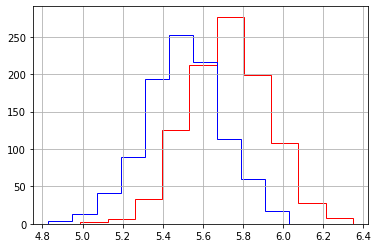

In [50]:
means.meangrade.hist(histtype='step', color='red')
bootstrap.meangrade.hist(histtype='step', color='blue')